In [2]:
import pandas as pd
import numpy as np
import math
from statistics import mean,stdev,variance
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn import preprocessing
import seaborn as sns
import matplotlib.ticker as ticker
import os

pd.set_option('display.max_rows', 600)

#dirName = 'convergence_plots'
#os.makedirs(dirName)

In [3]:
## the _all files are array of 4: delta_avg, delta_max, delta_max_last50, final_position
sphere_all=joblib.load('convergence pickle files/sphere_all_newseed1.pkl')
rosen_all=joblib.load('convergence pickle files/rosen_all_newseed1.pkl')
rastrigin_all=joblib.load('convergence pickle files/rastrigin_all_newseed1.pkl')
griewank_all=joblib.load('convergence pickle files/griewank_all_newseed1.pkl')
schaffer_all=joblib.load('convergence pickle files/schaffer_all_newseed1.pkl')



## Re-running simulations for robustness

In [164]:
## the _all files are array of 4: delta_avg, delta_max, delta_max_last50, final_position
def reader(number):
    sphere_all=joblib.load('convergence pickle files/sphere_all_newseed{}.pkl'.format(number))
    rosen_all=joblib.load('convergence pickle files/rosen_all_newseed{}.pkl'.format(number))
    rastrigin_all=joblib.load('convergence pickle files/rastrigin_all_newseed{}.pkl'.format(number))
    griewank_all=joblib.load('convergence pickle files/griewank_all_newseed{}.pkl'.format(number))
    schaffer_all=joblib.load('convergence pickle files/schaffer_all_newseed{}.pkl'.format(number))
    return sphere_all,rosen_all,rastrigin_all,griewank_all,schaffer_all


In [276]:
## change the number according to the filename 1-10
reader_files=reader("10")

In [277]:
sphere_all=reader_files[0]
rosen_all=reader_files[1]
rastrigin_all=reader_files[2]
griewank_all=reader_files[3]
schaffer_all=reader_files[4]

In [278]:
def minmax_scaler(matrix):
    mat_scale_indiv=np.zeros([12,45],dtype=np.ndarray)

    for i in range(0,12):
        for j in range(0,45):
            mat_scale_indiv[i,j]=preprocessing.minmax_scale(matrix[i][j])
    return mat_scale_indiv

In [279]:
sphere_avg_scaled=minmax_scaler(sphere_all[0])
rosen_avg_scaled=minmax_scaler(rosen_all[0])
rastrigin_avg_scaled=minmax_scaler(rastrigin_all[0])
griewank_avg_scaled=minmax_scaler(griewank_all[0])
schaffer_avg_scaled=minmax_scaler(schaffer_all[0])

In [280]:
## get matrix but not plots
def save_plots_1a(file,fn_name):
    mat=np.zeros([12,45],dtype=np.ndarray)
    
    ## function to calculate regression gradient
    def gradient(x,y):
        poly = np.polyfit(x,y,1)
        poly_y = np.poly1d(poly)(x)
        return poly_y
    
    ## classification result in values
    def cat(res,slope):
        if res > 0.75:
            return 0
        elif slope > 0:
            return 1
        else:
            return -1
        
    ## classification result in description        
    def cat_description(res,slope):
        if res > 0.75:
            return "Oscillation"
        elif slope > 0:
            return "Stagnation"
        else:
            return "Convergence"
    
    ## fitting polynomials and original fit
    for i in range(0,12):
        for j in range(0,45):
            list_y=file[i][j]
            poly = np.polyfit(range(0,50),list_y,5)
            poly_y = np.poly1d(poly)(range(0,50))
            #plt.figure(figsize=(10,8))
            ### calculating residuals
            res=sum((poly_y-list_y)**2)

            ### calculating gradient
            grad=gradient(range(0,50),poly_y)
            slope=(grad[49]-grad[0])

            ## storing classification result in matrix
            mat[i][j]=cat(res,slope)  
                 
    return mat    

In [281]:
## saving heatmap matrices
sphere_avg_heatmap=save_plots_1a(sphere_avg_scaled,"Sphere")
rosen_avg_heatmap=save_plots_1a(rosen_avg_scaled,"Rosenbrock")
rastrigin_avg_heatmap=save_plots_1a(rastrigin_avg_scaled,"Rastrigin")
griewank_avg_heatmap=save_plots_1a(griewank_avg_scaled,"Griewank")
schaffer_avg_heatmap=save_plots_1a(schaffer_avg_scaled,"Schaffer")

In [282]:
# dirName = 'final_submission_files'
# os.makedirs(dirName)

In [283]:
joblib.dump([sphere_avg_heatmap,rosen_avg_heatmap,rastrigin_avg_heatmap,griewank_avg_heatmap
            ,schaffer_avg_heatmap],"final_submission_files/delta_avg_10.pkl")

['final_submission_files/delta_avg_10.pkl']

# delta max

In [284]:
def delta_max_average(function, fn_name):
    mat=np.zeros([12,45],dtype=np.ndarray)
    for i in range(0,12):
        for j in range(0,45):
            mat[i][j]=np.mean(function[2][i][j])
    flattened_list = [y for x in mat for y in x]
    for i in range(0,12):
        for j in range(0,45):
            mat[i][j]=min(mat[i][j],np.percentile(flattened_list,75))
    return mat

In [285]:
delta_max_sphere=delta_max_average(sphere_all,"Sphere")
delta_max_rastrigin=delta_max_average(rastrigin_all,"Rastrigin")
delta_max_griewank=delta_max_average(griewank_all,"Griewank")
delta_max_rosenbrock=delta_max_average(rosen_all,"Rosenbrock")
delta_max_schaffer=delta_max_average(schaffer_all,"Schaffer")

In [286]:
joblib.dump([delta_max_sphere,delta_max_rosenbrock,delta_max_rastrigin,delta_max_griewank
            ,delta_max_schaffer],"final_submission_files/delta_max_10.pkl")

['final_submission_files/delta_max_10.pkl']

## Averaging the values for delta_avg and delta_max of 10 runs

delta_avg and delta_max files are array of 5 functions as the following order: sphere [0], rosenbrock [1], rastrigin [2], griewank [3] and schaffer [4]

In [298]:
delta_avg_1=np.asarray(joblib.load('final_submission_files/delta_avg_1.pkl'))
delta_avg_2=np.asarray(joblib.load('final_submission_files/delta_avg_2.pkl'))
delta_avg_3=np.asarray(joblib.load('final_submission_files/delta_avg_3.pkl'))
delta_avg_4=np.asarray(joblib.load('final_submission_files/delta_avg_4.pkl'))
delta_avg_5=np.asarray(joblib.load('final_submission_files/delta_avg_5.pkl'))
delta_avg_6=np.asarray(joblib.load('final_submission_files/delta_avg_6.pkl'))
delta_avg_7=np.asarray(joblib.load('final_submission_files/delta_avg_7.pkl'))
delta_avg_8=np.asarray(joblib.load('final_submission_files/delta_avg_8.pkl'))
delta_avg_9=np.asarray(joblib.load('final_submission_files/delta_avg_9.pkl'))
delta_avg_10=np.asarray(joblib.load('final_submission_files/delta_avg_10.pkl'))

delta_max_1=np.asarray(joblib.load('final_submission_files/delta_max_1.pkl'))
delta_max_2=np.asarray(joblib.load('final_submission_files/delta_max_2.pkl'))
delta_max_3=np.asarray(joblib.load('final_submission_files/delta_max_3.pkl'))
delta_max_4=np.asarray(joblib.load('final_submission_files/delta_max_4.pkl'))
delta_max_5=np.asarray(joblib.load('final_submission_files/delta_max_5.pkl'))
delta_max_6=np.asarray(joblib.load('final_submission_files/delta_max_6.pkl'))
delta_max_7=np.asarray(joblib.load('final_submission_files/delta_max_7.pkl'))
delta_max_8=np.asarray(joblib.load('final_submission_files/delta_max_8.pkl'))
delta_max_9=np.asarray(joblib.load('final_submission_files/delta_max_9.pkl'))
delta_max_10=np.asarray(joblib.load('final_submission_files/delta_max_10.pkl'))


In [315]:
delta_avg=(delta_avg_1+delta_avg_2+delta_avg_3+delta_avg_4+delta_avg_5+delta_avg_6+delta_avg_7+delta_avg_8+delta_avg_9+delta_avg_10)/10
delta_max=(delta_max_1+delta_max_2+delta_max_3+delta_max_4+delta_max_5+delta_max_6+delta_max_7+delta_max_8+delta_max_9+delta_max_10)/10

In [314]:
# when plotting change the delta_avg[x] accordingly to 0-4
plt.figure(figsize=(11,9))
sns.heatmap(pd.DataFrame(delta_avg[4],dtype="float"), square=True, linewidths=1, xticklabels=[x/10 for x in range(0, 45)],
            yticklabels=[x/10 for x in range(0, 12)], cbar_kws={"shrink": .3},cmap="coolwarm")
plt.title("Schaffer $\Delta_{avg}$ Heatmap (average 10 runs) \n (-1 = Convergence, 0 = Oscillation, 1 = Stagnation)")
plt.xlabel("$c_1$+$c_2$")
plt.ylabel("w")
plt.savefig("final_submission_files/plots/schaffer_avg.png")
plt.clf()

<Figure size 792x648 with 0 Axes>

In [324]:
# when plotting change the delta_avg[x] accordingly to 0-4
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame(delta_max[4],dtype="float64"), square=True, linewidths=1, xticklabels=[x/10 for x in range(0, 45)],
              yticklabels=[x/10 for x in range(0, 12)],cbar_kws={"shrink": .4},cmap="coolwarm")
plt.title("Schaffer $\Delta_{{max}}$ Heatmap")
plt.xlabel("$c_1$+$c_2$")
plt.ylabel("w")
plt.savefig("final_submission_files/plots/schaffer_max.png")
plt.clf()

<Figure size 1080x720 with 0 Axes>

### Combined heatmaps

In [329]:
## scaling delta max for combined heatmaps
def delta_max_scaled_addendum(function):
    mat=np.zeros([12,45],dtype=np.ndarray)
    for i in range(0,12):
        for j in range(0,45):
            mat[i][j]=np.mean(function[i][j])
    flattened_list = [y for x in mat for y in x]
    cap=np.percentile(flattened_list,75)
    minimum=min(flattened_list)
    maximum=cap
    for i in range(0,12):
        for j in range(0,45):
            mat[i][j]=(2*(min(mat[i][j],cap)-minimum)/(maximum-minimum))-1
    
    return mat

In [331]:
sphere_delta_max_scaled_addendum=delta_max_scaled_addendum(delta_max[0])
rastrigin_delta_max_scaled_addendum=delta_max_scaled_addendum(delta_max[2])
griewank_delta_max_scaled_addendum=delta_max_scaled_addendum(delta_max[3])
rosen_delta_max_scaled_addendum=delta_max_scaled_addendum(delta_max[1])
schaffer_delta_max_scaled_addendum=delta_max_scaled_addendum(delta_max[4])

In [335]:
sphere_delta_max_scaled_addendum+rastrigin_delta_max_scaled_addendum
+griewank_delta_max_scaled_addendum+rosen_delta_max_scaled_addendum+schaffer_delta_max_scaled_addendum

array([[3.0, -2.65949775361691, -2.5471087406009723, -2.5994945654384556,
        -2.6622160633269667, -2.5712938596651704, -2.6831728212147667,
        -2.510335838803427, -2.597983215594848, -2.500953521079115,
        -2.461214891020531, -2.558210226251516, -2.467424501610171,
        -2.5356704698525263, -2.4313435886153383, -2.4754775268808533,
        -2.379804241052156, -2.3444074264980777, -2.1361706073001083,
        -2.1495473051991976, -2.137872367685538, -2.040363214192455,
        -2.2121415475854356, -2.1395434245430036, -2.004136636749665,
        -1.9074964533019467, -2.092913200991386, -2.089389885296655,
        -2.0309874988894574, -2.043831152682902, -2.2370174790730584,
        -2.1817063445084095, -2.191075411209194, -2.410450673412287,
        -2.3723644506830506, -2.4295110652604786, -2.142984845938047,
        -2.640288372601594, -2.1863422284446217, -0.21363188954313905,
        1.553741334697266, 3.0, 3.0, 3.0, 3.0],
       [3.0, -2.617450397804783, -2.635239

In [334]:
delta_avg[0]+delta_avg[1]+delta_avg[2]+delta_avg[3]+delta_avg[4]+sphere_delta_max_scaled_addendum+rastrigin_delta_max_scaled_addendum
+griewank_delta_max_scaled_addendum+rosen_delta_max_scaled_addendum+schaffer_delta_max_scaled_addendum

array([[3.0, -2.65949775361691, -2.5471087406009723, -2.5994945654384556,
        -2.6622160633269667, -2.5712938596651704, -2.6831728212147667,
        -2.510335838803427, -2.597983215594848, -2.500953521079115,
        -2.461214891020531, -2.558210226251516, -2.467424501610171,
        -2.5356704698525263, -2.4313435886153383, -2.4754775268808533,
        -2.379804241052156, -2.3444074264980777, -2.1361706073001083,
        -2.1495473051991976, -2.137872367685538, -2.040363214192455,
        -2.2121415475854356, -2.1395434245430036, -2.004136636749665,
        -1.9074964533019467, -2.092913200991386, -2.089389885296655,
        -2.0309874988894574, -2.043831152682902, -2.2370174790730584,
        -2.1817063445084095, -2.191075411209194, -2.410450673412287,
        -2.3723644506830506, -2.4295110652604786, -2.142984845938047,
        -2.640288372601594, -2.1863422284446217, -0.21363188954313905,
        1.553741334697266, 3.0, 3.0, 3.0, 3.0],
       [3.0, -2.617450397804783, -2.635239

Text(114.0, 0.5, 'w')

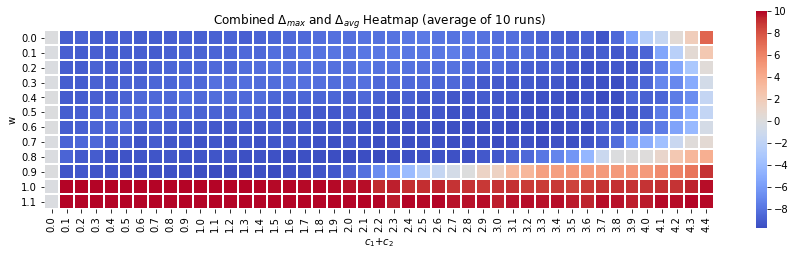

In [338]:
# both combined
## delta_max combined
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame((delta_avg[0]+delta_avg[1]+delta_avg[2]+delta_avg[3]+delta_avg[4]+sphere_delta_max_scaled_addendum+rastrigin_delta_max_scaled_addendum
+griewank_delta_max_scaled_addendum+rosen_delta_max_scaled_addendum+schaffer_delta_max_scaled_addendum),dtype="float64"), square=True, linewidths=1, xticklabels=[x/10 for x in range(0, 45)],
              yticklabels=[x/10 for x in range(0, 12)],cbar_kws={"shrink": .4,"ticks": [-10,-8,-6,-4,-2,0,2,4,6,8,10]},cmap="coolwarm")
plt.title("Combined $\Delta_{{max}}$ and $\Delta_{{avg}}$ Heatmap (average of 10 runs)")
plt.xlabel("$c_1$+$c_2$")
plt.ylabel("w")